# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
% load_ext autoreload

In [5]:
% autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

% time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 2.7 s, sys: 13.1 ms, total: 2.72 s
Wall time: 2.72 s
Train ROC-AUC 0.9898
Valid ROC-AUC 0.9175
Test ROC-AUC 0.9140


## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [ ]:
from tqdm import tqdm

results = {}
results['train'], results['test'] = {}, {}

depths = range(1, 30, 2)

for value in tqdm(depths):
    base_model_params = {'max_depth': value}
    boosting = Boosting(base_model_params=base_model_params)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['test'][value] = boosting.score(x_test, y_test)
    results['train'][value] = boosting.score(x_train, y_train)

100%|██████████| 15/15 [00:32<00:00,  2.16s/it]


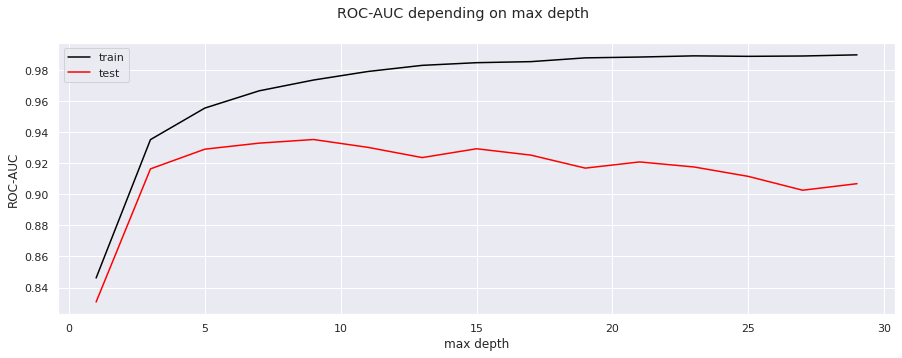

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on max depth')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('max depth')

plt.show()

In [ ]:
max_depth = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
max_depth

9

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**


Бустинг по своей природе как композиция, в которой модельки добавляются последовательно и с ориентиром на уже накопленную точность, имеет более низкое смещение, чем базовые модели, но более сильный разброс. Поэтому оптимально подавать в бустинг пусть более смещенные модели, но хотя бы несильно разбросанные. 

Чем глубже дерево, тем оно менее смещенное и более разбросанное (зависимое от конкретной выборки). Поэтому после определенного порога значения этого гиперпараметра (9) качество композиции начинает падать из-за возрастающего смещения. Более низкая смещенность базовых моделей в этом случае уже не особенно помогает, ведь даже с небольшой глубиной бустинг и так сокращает смещение за счет последовательного обучения своих участников.

Ну, а все, что до 9, это видимо недостаточная глубина для того, чтобы выявить скрытую закономерность в данных. 

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

### начнем с подбора для базовых моделей

**min samples split**

In [ ]:
results = {}
results['train'], results['test'] = {}, {}

min_samples_split =  range(50, 5000, 100)

for value in tqdm(min_samples_split):
    base_model_params = {'min_samples_split': value, 'max_depth': max_depth}
    boosting = Boosting(base_model_params=base_model_params)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['test'][value] = boosting.score(x_test, y_test)
    results['train'][value] = boosting.score(x_train, y_train)

100%|██████████| 50/50 [01:09<00:00,  1.39s/it]


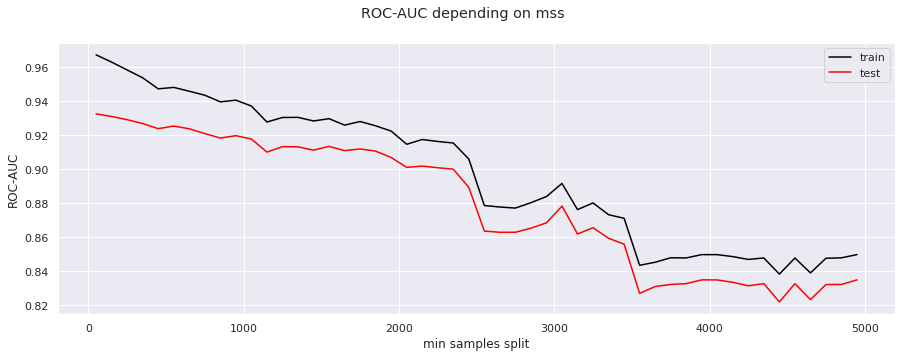

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on mss')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('min samples split')

plt.show()

In [ ]:
min_samples_split = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
print(min_samples_split)

50


**min samples leaf**

In [ ]:
results = {}
results['train'], results['test'] = {}, {}

min_samples_leaf =  range(50, 5000, 100)

for value in tqdm(min_samples_leaf):
    base_model_params = {'min_samples_split': min_samples_split, 
                         'max_depth': max_depth,
                         'min_samples_leaf': value}
    boosting = Boosting(base_model_params=base_model_params)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['test'][value] = boosting.score(x_test, y_test)
    results['train'][value] = boosting.score(x_train, y_train)

100%|██████████| 50/50 [01:04<00:00,  1.30s/it]


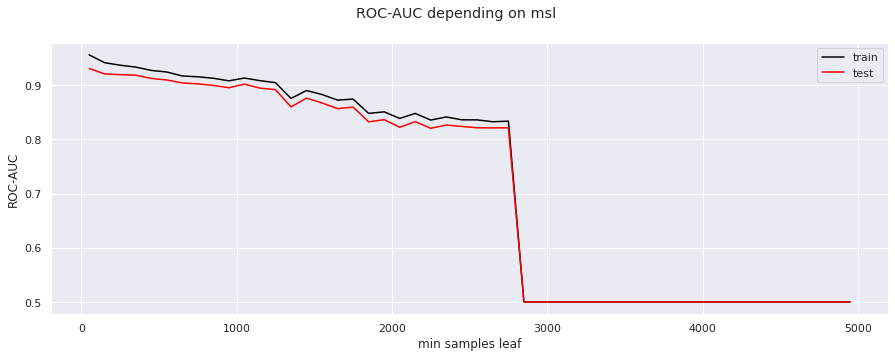

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on msl')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('min samples leaf')

plt.show()

In [ ]:
min_samples_leaf = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
print(min_samples_leaf)

50


**все остальное деревянное**

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2', None]
}

other_params = {'min_samples_split': min_samples_split, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

results = {}

for grid in tqdm(list(ParameterGrid(param_grid))):
    base_model_params = {**grid, **other_params}
    boosting = Boosting(base_model_params=base_model_params)
    boosting.fit(x_train, y_train, x_valid, y_valid)

    results[boosting.score(x_test, y_test)] = base_model_params

100%|██████████| 18/18 [01:09<00:00,  3.87s/it]


In [ ]:
base_model_params = list(results.values())[np.argmax(list(results.keys()))]
base_model_params

{'criterion': 'friedman_mse',
 'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'splitter': 'best'}

### теперь сам бустинг

In [ ]:
results = {}
results['train'], results['test'] = {}, {}

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 1]

for value in tqdm(learning_rate):
    boosting = Boosting(base_model_params=base_model_params, learning_rate=value)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['test'][value] = boosting.score(x_test, y_test)
    results['train'][value] = boosting.score(x_train, y_train)

100%|██████████| 7/7 [00:10<00:00,  1.50s/it]


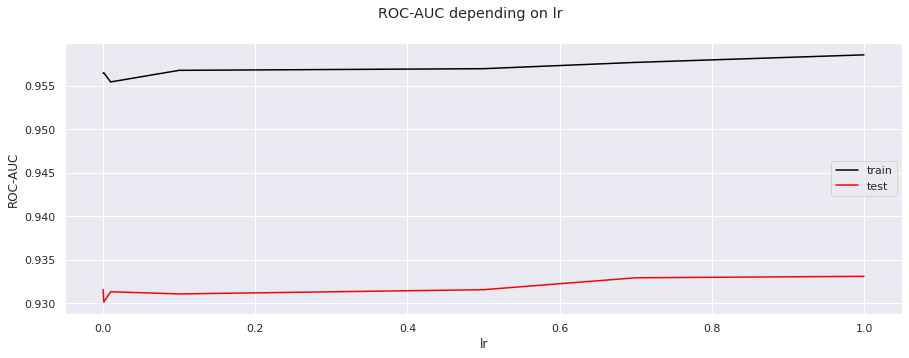

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on lr')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('lr')

plt.show()

In [ ]:
learning_rate = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
learning_rate

1

In [ ]:
results = {}
results['train'], results['test'] = {}, {}

n_estimators = range(1, 500, 50)

for value in tqdm(n_estimators):
    boosting = Boosting(base_model_params=base_model_params, 
                        learning_rate=learning_rate,
                        n_estimators=value)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['test'][value] = boosting.score(x_test, y_test)
    results['train'][value] = boosting.score(x_train, y_train)

100%|██████████| 10/10 [17:47<00:00, 106.75s/it]


In [ ]:
n_estimators = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
n_estimators

51

In [ ]:
# процесс сбросился, все переменные потерялись, щас восстановим

max_depth, min_samples_split, min_samples_leaf, learning_rate, n_estimators = 9, 50, 50, 1, 51
base_model_params = {'criterion': 'friedman_mse',
                    'max_depth': 9,
                    'max_features': None,
                    'min_samples_leaf': 50,
                    'min_samples_split': 50,
                    'splitter': 'best'}

### итоговое качество

In [ ]:
boosting = Boosting(base_model_params=base_model_params, 
                        learning_rate=learning_rate,
                        n_estimators=n_estimators)
boosting.fit(x_train, y_train, x_valid, y_valid)
boosting.score(x_test, y_test)

0.9338907581681027

качество и правда стало лучше:

- дефолтные гиперпараметры: 0.914
- прикольные гиперпараметры: 0.93389

## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [21]:
!pip install catboost -q

from boosting import score

from catboost import CatBoostClassifier

     |████████████████████████████████| 76.3 MB 56 kB/s 


запомним дефолтное качество

In [22]:
cbc = CatBoostClassifier()
cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid), verbose=0)
score(cbc, x_test, y_test)

0.9407961135087219

#### деревянное

**depth**

In [ ]:
results = {}
results['train'], results['test'] = {}, {}

depth = [4, 5, 6, 7, 8, 9, 10] # options from documentation 

for value in tqdm(depth):
    cbc = CatBoostClassifier(depth=value, verbose=0)
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    results['test'][value] = score(cbc, x_test, y_test)
    results['train'][value] = score(cbc, x_train, y_train)

100%|██████████| 7/7 [01:22<00:00, 11.83s/it]


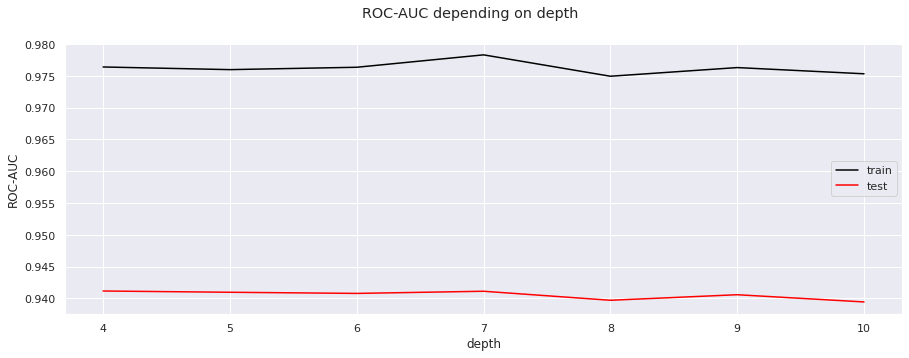

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on depth')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('depth')

plt.show()

In [ ]:
depth = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
depth

4

**min_data_in_leaf**

In [ ]:
results = {}
results['train'], results['test'] = {}, {}

min_data_in_leaf = np.arange(5, 55, 5) ** 2

for value in tqdm(min_data_in_leaf):
    cbc = CatBoostClassifier(min_data_in_leaf=value, depth=depth, verbose=0)
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    results['test'][value] = score(cbc, x_test, y_test)
    results['train'][value] = score(cbc, x_train, y_train)

min_data_in_leaf = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
min_data_in_leaf

100%|██████████| 10/10 [00:54<00:00,  5.41s/it]


25

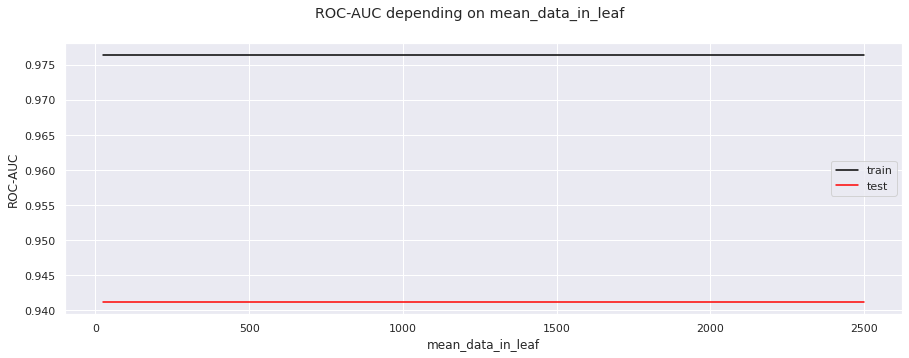

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on mean_data_in_leaf')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('mean_data_in_leaf')

plt.show()

**l2_leaf_reg**

In [ ]:
results = {}
results['train'], results['test'] = {}, {}

l2_leaf_reg = np.arange(5) ** 2

for value in tqdm(l2_leaf_reg):
    cbc = CatBoostClassifier(l2_leaf_reg=value, depth=depth, 
                             min_data_in_leaf=min_data_in_leaf, verbose=0)
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    results['test'][value] = score(cbc, x_test, y_test)
    results['train'][value] = score(cbc, x_train, y_train)

l2_leaf_reg = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
l2_leaf_reg

100%|██████████| 5/5 [00:28<00:00,  5.77s/it]


9

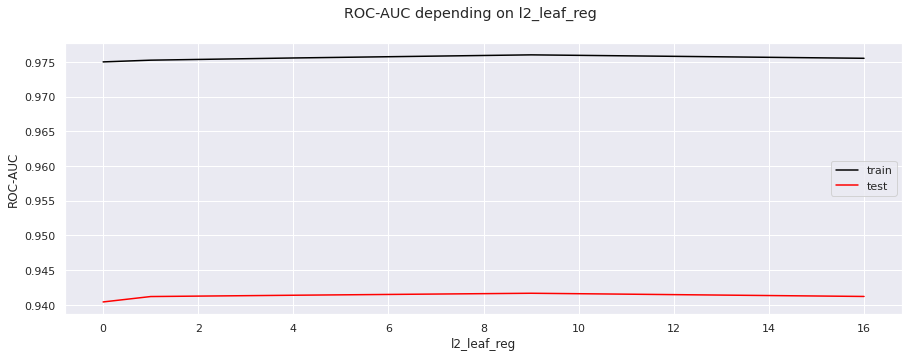

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on l2_leaf_reg')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('l2_leaf_reg')

plt.show()

#### композиционное

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    # 'boostrap_type': ['Bayesian', 'Bernoulli', 'MVS'], # параметр, который есть в документации и гугле, но не здесь..............
    'boosting_type': ['Ordered', 'Plain'],
    'leaf_estimation_method': ['Newton', 'Gradient', 'Exact']
}

other_params = {'depth': depth, 
                'mean_data_in_leaf': min_data_in_leaf, 
                'l2_leaf_reg': l2_leaf_reg,
                'verbose': 0}

results = {}

for grid in tqdm(list(ParameterGrid(param_grid))):
    print(grid)
    cbc = CatBoostClassifier(verbose=0, 
                             l2_leaf_reg=l2_leaf_reg, 
                             depth=depth, 
                             min_data_in_leaf=min_data_in_leaf,
                             boosting_type=grid['boosting_type'],
                            #  bootstrap_type=grid['bootstrap_type'],
                             leaf_estimation_method=grid['leaf_estimation_method']
                             )
    try:
        cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
        results[boosting.score(x_test, y_test)] = grid
    except CatBoostError:
        pass

grid = list(results.values())[np.argmax(list(results.keys()))]
grid

  0%|          | 0/6 [00:00<?, ?it/s]

{'boosting_type': 'Ordered', 'leaf_estimation_method': 'Newton'}


 17%|█▋        | 1/6 [00:17<01:29, 17.84s/it]

{'boosting_type': 'Ordered', 'leaf_estimation_method': 'Gradient'}


 33%|███▎      | 2/6 [01:02<02:14, 33.70s/it]

{'boosting_type': 'Ordered', 'leaf_estimation_method': 'Exact'}
{'boosting_type': 'Plain', 'leaf_estimation_method': 'Newton'}


 67%|██████▋   | 4/6 [01:07<00:28, 14.12s/it]

{'boosting_type': 'Plain', 'leaf_estimation_method': 'Gradient'}


100%|██████████| 6/6 [01:18<00:00, 13.05s/it]

{'boosting_type': 'Plain', 'leaf_estimation_method': 'Exact'}


{'boosting_type': 'Plain', 'leaf_estimation_method': 'Gradient'}

In [ ]:
# best_model_min_trees

results = {}
results['train'], results['test'] = {}, {}

best_model_min_trees =  np.arange(5, 55, 5) ** 2

for value in tqdm(best_model_min_trees):
    cbc = CatBoostClassifier(l2_leaf_reg=l2_leaf_reg, depth=depth, 
                             min_data_in_leaf=min_data_in_leaf, verbose=0,
                             boosting_type=grid['boosting_type'],
                             leaf_estimation_method=grid['leaf_estimation_method'],
                             best_model_min_trees=value
                             )
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    results['test'][value] = score(cbc, x_test, y_test)
    results['train'][value] = score(cbc, x_train, y_train)

best_model_min_trees = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
best_model_min_trees

100%|██████████| 10/10 [01:49<00:00, 10.95s/it]


900

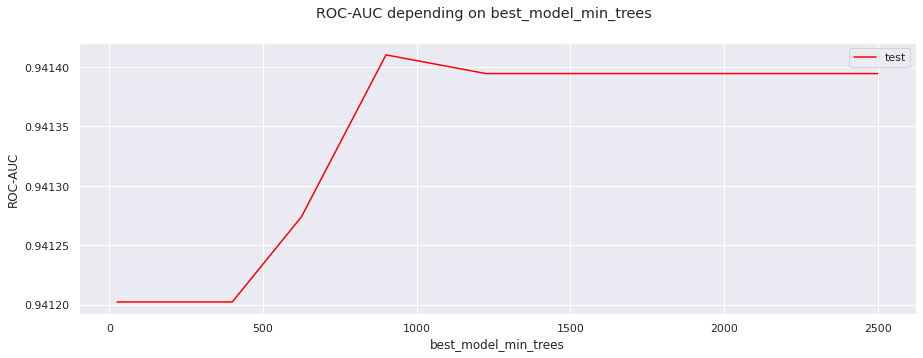

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on best_model_min_trees')

# sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('best_model_min_trees')

plt.show()

**итоговое качество**

In [ ]:
cbc = CatBoostClassifier(l2_leaf_reg=l2_leaf_reg, depth=depth, 
                            min_data_in_leaf=min_data_in_leaf, verbose=0,
                            boosting_type=grid['boosting_type'],
                            leaf_estimation_method=grid['leaf_estimation_method'],
                            best_model_min_trees=best_model_min_trees
                            )
cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
score(cbc, x_test, y_test)

0.9414101677942697

качество выросло, но едва ощутимо: с 0.94079 до 0.94141

но даже это лучше моей затюненной реализации, качество той составило 0.93389

### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

беру оптуну, у нее дружелюбный фронтенд 

In [ ]:
! pip install optuna -q

     |████████████████████████████████| 308 kB 4.3 MB/s 
     |████████████████████████████████| 80 kB 7.2 MB/s 
     |████████████████████████████████| 209 kB 33.0 MB/s 
     |████████████████████████████████| 75 kB 3.4 MB/s 
     |████████████████████████████████| 149 kB 40.7 MB/s 
     |████████████████████████████████| 112 kB 52.8 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 


In [12]:
# из домашнего файла
from sklearn.metrics import roc_auc_score

def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

In [ ]:
# hand-made boosting w/o base_model_params

from sklearn.metrics import roc_auc_score
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 500, 50)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 1.0, step=0.05)

    max_depth = trial.suggest_int('max_depth', 1, 30, 2) 
    min_samples_split = trial.suggest_int('min_samples_split', 1, 5000, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5000, 100)
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    classifier_obj = Boosting(n_estimators=n_estimators, learning_rate=learning_rate,
                              base_model_params={
                                  'max_depth': max_depth,
                                  'min_samples_split': min_samples_split,
                                  'min_samples_leaf': min_samples_leaf,
                                  'criterion': criterion,
                                  'splitter': splitter,
                                  'max_features': max_features
                              })
    classifier_obj.fit(x_test, y_test, x_valid, y_valid)
    return score(classifier_obj, x_test, y_test)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
print(study.best_params)

[I 2021-12-17 22:06:31,443] A new study created in memory with name: no-name-b28032a9-5ca6-40c9-b5bf-2f1f4eebad70
[I 2021-12-17 22:06:35,798] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 101, 'learning_rate': 0.7501, 'max_depth': 21, 'min_samples_split': 1201, 'min_samples_leaf': 1101, 'criterion': 'friedman_mse', 'splitter': 'random', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5.
[I 2021-12-17 22:06:37,304] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 51, 'learning_rate': 0.6501, 'max_depth': 19, 'min_samples_split': 201, 'min_samples_leaf': 501, 'criterion': 'absolute_error', 'splitter': 'random', 'max_features': None}. Best is trial 0 with value: 0.5.
[I 2021-12-17 22:06:50,497] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 201, 'learning_rate': 0.4001, 'max_depth': 13, 'min_samples_split': 301, 'min_samples_leaf': 3001, 'criterion': 'absolute_error', 'splitter': 'best', 'max_features': None}. Best is trial 0 

{'n_estimators': 101, 'learning_rate': 0.7501, 'max_depth': 21, 'min_samples_split': 1201, 'min_samples_leaf': 1101, 'criterion': 'friedman_mse', 'splitter': 'random', 'max_features': 'sqrt'}


что-то как-то неуспешно, попробуем без вложенных гиперпараметров

In [ ]:
# hand-made boosting w/o base_model_params

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 500, 50)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 1.0, step=0.05)

    # max_depth = trial.suggest_int('max_depth', 1, 30, 2) 
    # min_samples_split = trial.suggest_int('min_samples_split', 1, 5000, 100)
    # min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5000, 100)
    # criterion = trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error'])
    # splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    # max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    classifier_obj = Boosting(n_estimators=n_estimators, learning_rate=learning_rate)
                            #   base_model_params={
                            #       'max_depth': max_depth,
                            #       'min_samples_split': min_samples_split,
                            #       'min_samples_leaf': min_samples_leaf,
                            #       'criterion': criterion,
                            #       'splitter': splitter,
                            #       'max_features': max_features
                            #   })
    classifier_obj.fit(x_test, y_test, x_valid, y_valid)
    return score(classifier_obj, x_test, y_test)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
print(study.best_params)

[I 2021-12-17 22:10:33,408] A new study created in memory with name: no-name-d7fd7176-b464-48a2-a3c9-4fb674ccbd05
[I 2021-12-17 22:11:40,587] Trial 0 finished with value: 0.9881617418988132 and parameters: {'n_estimators': 251, 'learning_rate': 0.10010000000000001}. Best is trial 0 with value: 0.9881617418988132.
[I 2021-12-17 22:11:45,560] Trial 1 finished with value: 0.9860471908590933 and parameters: {'n_estimators': 51, 'learning_rate': 0.7001000000000001}. Best is trial 0 with value: 0.9881617418988132.
[I 2021-12-17 22:13:31,363] Trial 2 finished with value: 0.9894748733709847 and parameters: {'n_estimators': 351, 'learning_rate': 0.4501}. Best is trial 2 with value: 0.9894748733709847.
[I 2021-12-17 22:14:39,572] Trial 3 finished with value: 0.982181010607394 and parameters: {'n_estimators': 301, 'learning_rate': 0.0001}. Best is trial 2 with value: 0.9894748733709847.
[I 2021-12-17 22:16:17,254] Trial 4 finished with value: 0.9893221470486819 and parameters: {'n_estimators': 40

{'n_estimators': 351, 'learning_rate': 0.4501}


вот здесь уже намного лучше! 

0.989 -- какое-то сказочное качество для теста, катбустовское 0.94 и мое 0.93 просто меркнут 

In [ ]:
# catboost

def objective(trial):
    depth = trial.suggest_int('depth', 4, 10, 1)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 0, 1000, 100)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 0, 25, 1)
    boosting_type = trial.suggest_categorical('boosting_type', ['Ordered', 'Plain'])
    leaf_estimation_method = trial.suggest_categorical('leaf_estimation_method', ['Newton', 'Gradient'])
    best_model_min_trees = trial.suggest_int('best_model_min_trees', 0, 1000, 100)
    
    classifier_obj = CatBoostClassifier(
        verbose=0,
        depth=depth,
        min_data_in_leaf=min_data_in_leaf,
        l2_leaf_reg=l2_leaf_reg,
        boosting_type=boosting_type,
        leaf_estimation_method=leaf_estimation_method,
        best_model_min_trees=best_model_min_trees,
    )
    classifier_obj.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    return score(classifier_obj, x_test, y_test)

study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective, n_trials=4)
print(study_cat.best_params)

[I 2021-12-17 22:30:14,259] A new study created in memory with name: no-name-724640a9-76df-4054-84c9-a336d1ed0a4b
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2021-12-17 22:31:56,442] Trial 0 finished with value: 0.9402411029044768 and parameters: {'depth': 8, 'min_data_in_leaf': 1000, 'l2_leaf_reg': 0, 'boosting_type': 'Ordered', 'leaf_estimation_method': 'Gradient', 'best_model_min_trees': 100}. Best is trial 0 with value: 0.9402411029044768.
[I 2021-12-17 22:32:08,809] Trial 1 finished with value: 0.9411440776038656 and parameters: {'depth': 5, 'min_data_in_leaf': 1000, 'l2_leaf_reg': 21, 'boosting_type': 'Plain', 'leaf_estimation_method': 'Gradient', 'best_model_min_trees': 600}. Best is trial 1 with value: 0.9411440776038656.
[I 2021-12-17 22:32:42,251] Trial 2 finished with value: 0.9408417739555959 and parameters: {'depth': 9, 'min_data_in_leaf': 0, 'l2_leaf_reg': 11, 'boosting_type': 'Plain', 'leaf_estimation_method': 'Grad

{'depth': 5, 'min_data_in_leaf': 0, 'l2_leaf_reg': 2, 'boosting_type': 'Plain', 'leaf_estimation_method': 'Newton', 'best_model_min_trees': 600}


а вот катбуст лишь каплю лучше моего ручного перебора: у меня вышло 0.94141, а у оптуны 0.94172

## Задание 6. Интерпретация бустингового (1 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга (из тех, что используют вашу реализацию).
Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
# из четвертой домашки

def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i 
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) # error: center is (a + b) / 2
        bin_real_ratios.append(sum(y_test[(preds >= l) & (preds < r)] == 1) / len(y_test[(preds >= l) & (preds < r)])) # error: we need ratio not whatever np.min(List[Bool]) returns
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

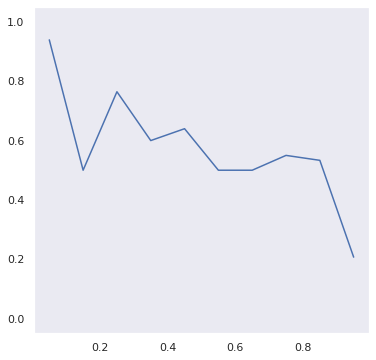

In [ ]:
preds = boosting.predict_proba(x_test)
# plot_calibration_curve(y_test, np.array([i[0] for i in preds]))
plot_calibration_curve(y_test, np.array(preds)[:,0])


ну, в целом какое-то стремление к приближению вероятностного пространства тут прослеживается, однако оно явно не самое сильное для этой композиции

кажется, крайние вероятности (очень высокие и очень низкие) данной композиции интереснее, чем вот все то, что происходит посередине. ну, это и логично, ведь мы и не ставили перед бустингом задачи быть той моделью, которая в ответ на объект выдает математическое ожидание его класса... 

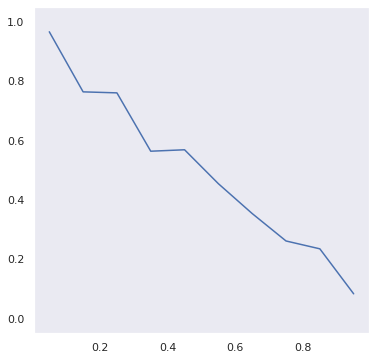

In [ ]:
from sklearn.linear_model import LogisticRegression

# plot_calibration_curve(y_test,
#                        np.array([i[0] for i in LogisticRegression().fit(x_train, y_train).predict_proba(x_test)]))
plot_calibration_curve(y_test, np.array(LogisticRegression().fit(x_train, y_train).predict_proba(x_test))[:,0])

а вот перед логрегом ставили. он это и делает. очень хорошая калибровочная прямая. 

таким образом, наглядно видно, что логрег оценивает вероятности намного лучше градбустинга. я думаю, это связано с опимизируемым функционалом: в бустинге хоть и фигурирует сигмоида, в какой-то момент мы все равно обращаемся к квадратичной функции потерь, а логрег целиком состоит из логлосса, у которого ноги растут из правдоподобия. 

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

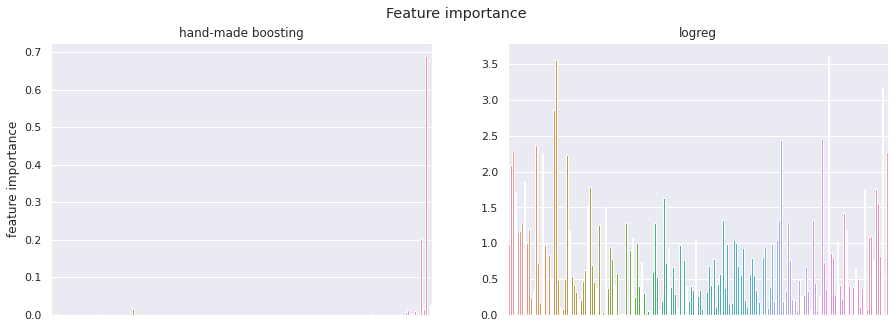

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Feature importance')

sns.barplot(y=boosting.feature_importances_, x=np.arange(boosting.n_features), ax=axes[0])
axes[0].set_title('hand-made boosting')
sns.barplot(y=np.abs(LogisticRegression().fit(x_train, y_train).coef_[0]), x=np.arange(boosting.n_features), ax=axes[1])
axes[1].set_title('logreg')
             
axes[0].set_ylabel('feature importance')

for ax in axes:
    ax.set_xticks([])
    # ax.set_yticks([])

plt.show()

логрег опирается на большее количество признаков, тогда как у бустинга явно есть кучка фаворитов и еще небольшая кучка признаков, чья важность едва отлична от нуля. я считаю, это связано с типом модели: в бустинге у нас деревья, которые каждый раз ищут наилучший сплит среди всех признаков, и наверняка находят примерно одинаковый (если не ошибаюсь, здесь мы как в рф не делаем подмножества признаков в каждой верщине), поэтому какая-то парочка признаков стабильно оказывается самой замеченной. 

в логреге же нет необходимости на каждой итерации смотреть только на один признак, поэтому здесь весовое распределение более равномерное.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

возьму десять процентов лучших и это будет еще с запасом

In [ ]:
feature_indices = np.argsort(boosting.feature_importances_)[::-1][:(boosting.n_features) // 10]

new_boosting = Boosting(base_model_params=base_model_params, 
                        learning_rate=learning_rate,
                        n_estimators=n_estimators)
new_boosting.fit(x_train[:, feature_indices],
                 y_train,
                 x_valid[:, feature_indices],
                 y_valid)

new_boosting.score(x_test[:, feature_indices], y_test)

0.9332660760199206

нет, стало самую малость хуже: с 0.93389 качество упало до 0.93326

но это и удивительно: я удалила 90% признаков и качество осталось почти на том же уровне. то есть мой бустинг реально опирается типа на 2-3 признака, а остальные почти ничего не решают.

## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

### загрузим и затюним модели из других библиотек 

In [13]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
score(xgb, x_test, y_test)

0.9387500531393131

In [ ]:
# hp tuning for xgboost

def objective(trial):

    booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])
    eta = trial.suggest_float('eta', 0.0001, 1.0, step=0.05)
    gamma = trial.suggest_float('gamma', 0, 1, step=0.1)
    max_depth = trial.suggest_int('max_depth', 4, 10, 1)
    
    classifier_obj = XGBClassifier(
        verbose=0,
        booster=booster,
        eta=eta,
        gamma=gamma,
        max_depth=max_depth
    )
    classifier_obj.fit(x_train, y_train)
    return score(classifier_obj, x_test, y_test)

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective, n_trials=10)
print(study_xgb.best_params)

[I 2021-12-17 22:39:10,538] A new study created in memory with name: no-name-74b83d6e-ef0f-4750-972e-bfe207cfe200
[I 2021-12-17 22:39:12,899] Trial 0 finished with value: 0.939344819822302 and parameters: {'booster': 'gbtree', 'eta': 0.7501, 'gamma': 0.0, 'max_depth': 7}. Best is trial 0 with value: 0.939344819822302.
[I 2021-12-17 22:39:15,958] Trial 1 finished with value: 0.9386111036759809 and parameters: {'booster': 'gbtree', 'eta': 0.30010000000000003, 'gamma': 0.30000000000000004, 'max_depth': 9}. Best is trial 0 with value: 0.939344819822302.
[I 2021-12-17 22:39:17,199] Trial 2 finished with value: 0.9394444068314327 and parameters: {'booster': 'gbtree', 'eta': 0.4001, 'gamma': 1.0, 'max_depth': 6}. Best is trial 2 with value: 0.9394444068314327.
[I 2021-12-17 22:39:21,392] Trial 3 finished with value: 0.9400663336078209 and parameters: {'booster': 'dart', 'eta': 0.10010000000000001, 'gamma': 0.6000000000000001, 'max_depth': 4}. Best is trial 3 with value: 0.9400663336078209.
[I

{'booster': 'dart', 'eta': 0.6001000000000001, 'gamma': 0.8, 'max_depth': 5}


In [14]:
! pip install lightgbm -q

In [15]:
import lightgbm as lgb
from lightgbm import LGBMClassifier 

train_data = lgb.Dataset(x_train, label=y_train)
valid_data = lgb.Dataset(x_valid, label=y_valid)
test_data = lgb.Dataset(x_test, label=y_test)

lgbc = LGBMClassifier()
lgbc.fit(x_train, y_train)
score(lgbc, x_test, y_test)

0.9394869182819706

In [ ]:
# hp tuning for ligth x b oo st

def objective(trial):

    boosting_type = trial.suggest_categorical('boosting_type', ['gbdt', 'dart'])
    num_leaves = trial.suggest_int('num_leaves', 2, 100, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 1.0, step=0.05)
    max_depth = trial.suggest_int('max_depth', 4, 10, 1)
    n_estimators = trial.suggest_int('n_estimators', 1, 500, 50)

    
    classifier_obj = LGBMClassifier(
        verbose=0,
        boosting_type=boosting_type,
        num_leaves=num_leaves,
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators
    )
    classifier_obj.fit(x_train, y_train)
    return score(classifier_obj, x_test, y_test)

study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective, n_trials=10)
print(study_lgb.best_params)

[I 2021-12-17 23:01:08,868] A new study created in memory with name: no-name-baf02507-89ea-4f90-8d7e-128849506eb4
[I 2021-12-17 23:01:15,896] Trial 0 finished with value: 0.9125775637160046 and parameters: {'boosting_type': 'dart', 'num_leaves': 72, 'learning_rate': 0.8001, 'max_depth': 8, 'n_estimators': 301}. Best is trial 0 with value: 0.9125775637160046.
[I 2021-12-17 23:01:16,129] Trial 1 finished with value: 0.9353684246988379 and parameters: {'boosting_type': 'dart', 'num_leaves': 12, 'learning_rate': 0.5001, 'max_depth': 8, 'n_estimators': 51}. Best is trial 1 with value: 0.9353684246988379.
[I 2021-12-17 23:01:16,283] Trial 2 finished with value: 0.9413672627191898 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 72, 'learning_rate': 0.30010000000000003, 'max_depth': 4, 'n_estimators': 51}. Best is trial 2 with value: 0.9413672627191898.
[I 2021-12-17 23:01:18,254] Trial 3 finished with value: 0.9406311848256165 and parameters: {'boosting_type': 'dart', 'num_leaves': 22

{'boosting_type': 'gbdt', 'num_leaves': 72, 'learning_rate': 0.30010000000000003, 'max_depth': 4, 'n_estimators': 51}


### а теперь как в лучших мейк-ап тюториалах, главное -- это blend!

In [56]:
import catboost
from sklearn.linear_model import LogisticRegression

ну короче как я поняла блендинг это когда мы берем несколько моделей, обучаем их на одной выборке, потом они делают предсказания для другой выборки, ответы к которой мы тоже знаем, и вот на их предсказаниях как на признаках мы учим еще какую-то метамодель

эта метамодель в итоге и будет главным спикером нашего ансамбля песни и пляски, именно ее предсказания будут предсказаниями всей композиции 

In [81]:
class Blender():

    def __init__(self, clfs, 
                clfs_params, 
                metamodel=LogisticRegression, 
                metamodel_params={}):

        self.clfs = clfs
        self.clfs_params = clfs_params

        self.metamodel = metamodel
        self.metamodel_params = metamodel_params

        self.meta_features = []
        self.models_trained = []

    def train_meta(self, features, target):
        self.metamodel = self.metamodel(**self.metamodel_params)
        self.metamodel.fit(features, target)

    def fit(self, x_train, y_train, x_valid, y_valid):
        for clf in self.clfs:
            model = clf(**self.clfs_params[clf])
            if clf == Boosting:
                model.fit(x_train, y_train, x_valid, y_valid)
            elif clf ==  catboost.core.CatBoostClassifier:
                model.fit(x_train, y_train, eval_set=(x_valid, y_valid), verbose=0)
            else:
                model.fit(x_train, y_train)
            self.models_trained.append(model)
            self.meta_features.append(model.predict_proba(x_valid)[:, 0])

        self.train_meta(np.array(self.meta_features).T, y_valid)

    def predict_proba(self, x_test):
        features = []
        for model in self.models_trained:
            features.append(model.predict_proba(x_test)[:, 0])
        return self.metamodel.predict_proba(np.array(features).T)
        

In [59]:
# соберем все (гипер)параметры в одном месте

clfs = [Boosting, CatBoostClassifier, LGBMClassifier, XGBClassifier]
clf_params = {Boosting: { 'base_model_params': {'criterion': 'friedman_mse',
                                                'max_depth': 9,
                                                'max_features': None,
                                                'min_samples_leaf': 50,
                                                'min_samples_split': 50,
                                                'splitter': 'best'},
                        'learning_rate': 1, 'n_estimators': 51 },
              
              catboost.core.CatBoostClassifier: {'depth': 5, 'min_data_in_leaf': 0, 
                                    'l2_leaf_reg': 2, 'boosting_type': 'Plain', 
                                    'leaf_estimation_method': 'Newton', 
                                    'best_model_min_trees': 600},
              
              LGBMClassifier: {'boosting_type': 'gbdt', 'num_leaves': 72, 
                               'learning_rate': 0.30010000000000003, 
                               'max_depth': 4, 'n_estimators': 51},
              
              XGBClassifier: {'booster': 'dart', 'eta': 0.6001000000000, 
                              'gamma': 0.8, 'max_depth': 5}
}

metamodel_params = {}
metamodel = LogisticRegression

In [82]:
blender = Blender(clfs, clf_params)
blender.fit(x_train, y_train, x_valid, y_valid)
score(blender, x_test, y_test)

0.9418203245670523

качество капельку улучшилось: до этого самый прикольный был затюненный lgb c его 0.94136, а тут вся композиция дала 0.94182

не знаю правда насколько это заметная разница, мне кажется не очень

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2022 года?

ситуация такая, что у меня 18.12 (сегодня) день рождения, поэтому елку мы наряжаем обычно позже этой даты, чтобы праздники не путались и я не чувствовала будто новый год затмевает мой др

поэтому вот фотка с елкой на улице!!! тоже нарядная

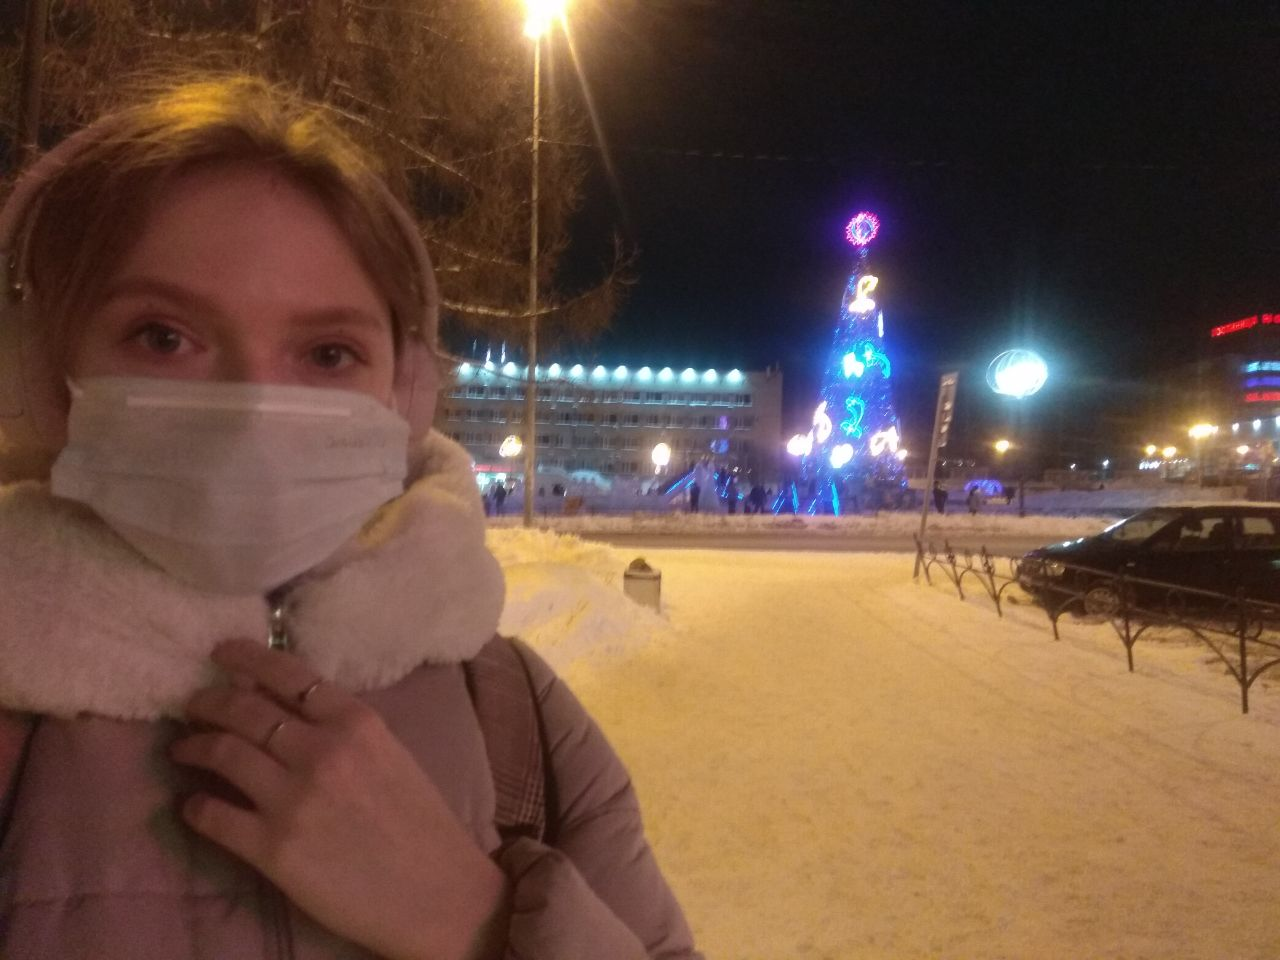

мои впечатления можно описать строчками одного современного автора: 

*я теперь боюсь мечтать*

*все стало реальным на глазах*

*что если проснусь в следующий раз (если проснусь)*

*и не захочу открыть глаза*

а вообще каждый раз ощущаю странное когда нужно прикладывать фотографию ради бонуса, ибо мне кажется я такой бред в домашке пишу, что хихи стыдно личико демонстрировать!! но да, вот так выглядит авторка

а еще а еще мне бесконечо не хочется отправлять эту домашку потому что она последняя и я над ней очень старалась и курс МО за этот семестр съел просто все мои нервы, я делала его и когда была на вершине мира, и когда была на эмоциональном дне, МО всегда было рядом -- каждую секунду висел какой-то гнетущий дедлайн, и я так привязалась, так прониклась, он буквально стал родным


а сейчас всё. он кончился. 

надеюсь что у проверяющей тоже отличные впечатления от курса!!!! хоть я и регулярно порчу их нестабильным качеством домашек и бесконечным копипастом кода (реально, если бы за это снижали, у меня была бы наверное отрицательная оценка за курс) 

спасибо большое за терпение!!! 

с новым годом!!! 

желаю самой легкой сессии на земле!!! самых приятных и неожиданных подарков!!! самых адекватных домашек!!!